In [16]:
import sklearn as sk
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [17]:
# diabetes_bunch = load_diabetes()

# Load the dataset with features (X) and target (y) as NumPy arrays
X, y = sk.datasets.load_diabetes(return_X_y=True)

# Load the dataset as a pandas DataFrame for easier analysis
# Requires scikit-learn version >= 0.23
# diabetes_df = load_diabetes(as_frame=True)
# X_df = diabetes_df.data
# y_df = diabetes_df.target


print(X)
print(y)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

In [18]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# Second split: Validation 20%, Test 20%
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

In [19]:


print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (442, 10)
Target shape: (442,)


In [20]:
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

In [21]:
import itertools
import functools
import numpy as np


def polynomial_transform(x, degree):
    """
    Performs transformation of input x into degree-d polynomial features.

    Arguments:
        x (array-like): Data of shape (n,)
        degree (int): Degree of polynomial

    Returns:
        np.ndarray: Polynomial transformation of x
    """
    if x.ndim == 1:
        x = x[:, None]

    x_t = x.T
    features = [np.ones(len(x))]

    for d in range(1, degree + 1):
        for items in itertools.combinations_with_replacement(x_t, d):
            features.append(
                functools.reduce(lambda a, b: a * b, items)
            )

    return np.asarray(features).T



In [22]:

model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel trained!")


Model trained!


In [23]:
y_val_pred = model.predict(X_val)
y_train_pred = model.predict(X_train)

val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("\n--- Validation Results ---")
print("Validation MSE:", val_mse)
print("Validation R²:", val_r2)
print("\n")
print("Train MSE:", train_mse)
print("Train R²:", train_r2)




--- Validation Results ---
Validation MSE: 2415.6922698969006
Validation R²: 0.5809667034070143


Train MSE: 2946.853593349735
Train R²: 0.5072191031715794


In [24]:
y_val_pred = model.predict(X_val)
y_train_pred = model.predict(X_train)


val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("\n--- Validation Results ---")
print("Validation MSE:", val_mse)
print("Validation R²:", val_r2)
print("\n")
print("Train MSE:", train_mse)
print("Train R²:", train_r2)




--- Validation Results ---
Validation MSE: 2415.6922698969006
Validation R²: 0.5809667034070143


Train MSE: 2946.853593349735
Train R²: 0.5072191031715794


In [25]:
y_pred = model.predict(X_test)
print(y_pred)

[215.2080922   64.44345728 230.72685744 178.78735199 161.02370532
 214.84929359 165.04020051 203.15615458 183.81100731  87.10828324
 159.31666784  72.35803778 107.47995394 114.72887833 132.17230855
 204.68992463 207.66139192  52.283906   112.80189841 188.5234894
 198.89785779 166.45807616 182.77973408 117.94824668 151.80478456
 168.03342308 132.77051892 201.28021132 142.4208209  162.82449457
 109.02440887 106.84661107 216.02607481  89.26131753  60.77434209
 161.49582752 150.83866123 289.34608309 106.39056545 121.02874843
 139.41091391 166.70125175  81.36111627 120.67833464 213.39997375
 131.3963031  192.22353318  49.70319738 191.98298678  64.70634012
 194.27809586  91.40910837 192.46231791 127.58697745 189.88685145
 149.55891252 158.1876368  120.26617836  63.39416734  68.80784003
 198.06221122 181.38907039 140.27919357 192.2987615  158.41940907
 261.50440322 175.43315525  95.78315582 119.99199925 130.34030205
 192.75051476  95.18488505 147.54909758  95.19269682 152.22541478
 163.895390

In [26]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Evaluation ---")
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
print("\nCoefficients/weights:", model.coef_)
print("Intercept/Bias:", model.intercept_)


--- Evaluation ---
Mean Squared Error (MSE): 3245.6114009752396
R² Score: 0.43891375898156637

Coefficients/weights: [  18.08799763 -227.04344876  592.27723487  361.54123241 -655.90738774
  353.71636413   14.41265469  142.87369371  594.01542882   31.67317969]
Intercept/Bias: 148.92850837170067


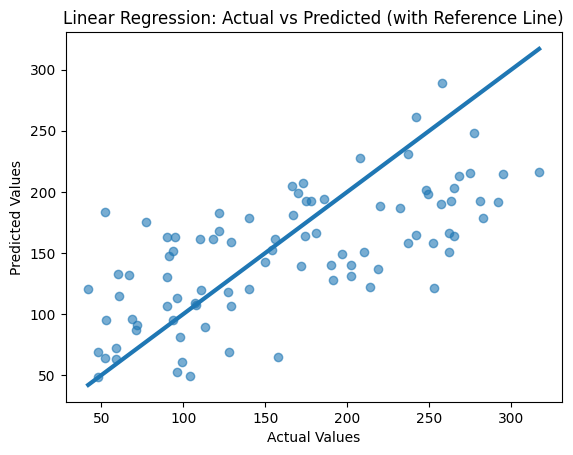

In [27]:
plt.scatter(y_test, y_pred, label="Predicted", alpha=0.6)

# Draw 45-degree reference line (perfect prediction)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

plt.plot([min_val, max_val], [min_val, max_val], linewidth=3)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted (with Reference Line)")
plt.show()


Training results
Train MSE: 2946.853593349735
Train R²: 0.5072191031715794

--- Validation Results ---
Validation MSE: 2415.6922698969006
Validation R²: 0.5809667034070143

 Testing result

--- Evaluation ---
Test  (MSE): 3245.6114009752396
Test R² Score: 0.43891375898156637


<BarContainer object of 3 artists>

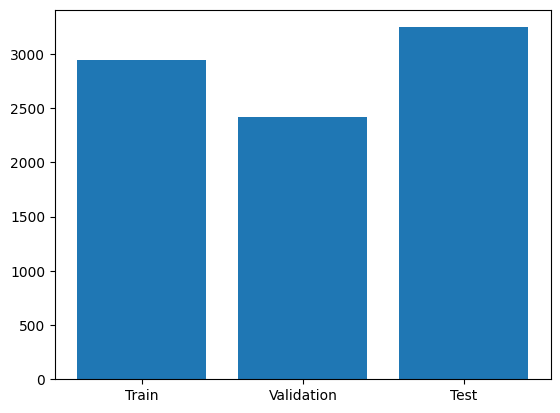

In [28]:
y_val_pred = model.predict(X_val)
y_train_pred = model.predict(X_train)

val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



print("\nTraining results")
print("Train MSE:", train_mse)
print("Train R²:", train_r2)


print("\n--- Validation Results ---")

print("Validation MSE:", val_mse)
print("Validation R²:", val_r2)

print("\n Testing result")

print("\n--- Evaluation ---")
print("Test  (MSE):", mse)
print("Test R² Score:", r2)

plt.bar(
    ["Train", "Validation", "Test"],
    [train_mse, val_mse, mse]
)



In [29]:
X_train_poly = polynomial_transform(X_train,2)
X_test_poly = polynomial_transform(X_test,2)
X_val_poly = polynomial_transform(X_val,2)
print(X_train)
print("\n")
print(X_train_poly)


model = LinearRegression()

model.fit(X_train_poly, y_train)


print("\n Poly Model trained!")

[[-0.01277963 -0.04464164  0.06061839 ...  0.03430886  0.07020738
   0.00720652]
 [ 0.06713621 -0.04464164  0.05630715 ... -0.00259226  0.07574055
   0.03620126]
 [ 0.06350368  0.05068012 -0.02560657 ... -0.00259226  0.03839393
   0.01963284]
 ...
 [ 0.03081083 -0.04464164 -0.02021751 ... -0.03949338 -0.01090325
  -0.0010777 ]
 [-0.01277963 -0.04464164 -0.02345095 ... -0.00259226 -0.03845972
  -0.03835666]
 [-0.09269548 -0.04464164  0.02828403 ... -0.03949338 -0.00514219
  -0.0010777 ]]


[[ 1.00000000e+00 -1.27796319e-02 -4.46416365e-02 ...  4.92907640e-03
   5.05950640e-04  5.19338776e-05]
 [ 1.00000000e+00  6.71362140e-02 -4.46416365e-02 ...  5.73663124e-03
   2.74190378e-03  1.31053157e-03]
 [ 1.00000000e+00  6.35036756e-02  5.06801187e-02 ...  1.47409373e-03
   7.53781738e-04  3.85448292e-04]
 ...
 [ 1.00000000e+00  3.08108295e-02 -4.46416365e-02 ...  1.18880875e-04
   1.17504060e-05  1.16143190e-06]
 [ 1.00000000e+00 -1.27796319e-02 -4.46416365e-02 ...  1.47914986e-03
   1.475186

In [30]:
y_pred = model.predict(X_test_poly)
print(y_pred)

y_val_pred = model.predict(X_val_poly)
y_train_pred = model.predict(X_train_poly)

val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



print("\nTraining results")
print("Train MSE:", train_mse)
print("Train R²:", train_r2)


print("\n--- Validation Results ---")

print("Validation MSE:", val_mse)
print("Validation R²:", val_r2)

print("\n Testing result")

print("\n--- Evaluation ---")
print("Test  (MSE):", mse)
print("Test R² Score:", r2)


[231.24342531  60.10780225 197.67674264 116.53840182 185.13873755
 243.08811908 128.68541609 195.91288961 185.5426767   47.70278119
 160.03116008  82.52356079 120.68843784  93.53611253  73.22826602
 202.32727783 282.05551857  55.86900278 102.42605811 175.43550237
 136.96574673 132.41021243 176.1339662  119.79391287 132.52616868
 167.22296765  77.95619563 205.93059094 136.89773547 150.04418282
 113.09310624  85.62743635 346.7936359  135.18307962 154.14184487
 180.85457931 144.56479643 263.14073291 109.25687608 102.07045807
 168.35717721 184.54574377  73.90821075 150.43325506 244.06876003
 151.4552491  217.11285389 167.23012171 116.26641005 121.38575441
 241.77791521  90.51320438 208.48746779 109.65571446 203.44493663
 152.62242561 163.93867391 113.13674097  63.67739361  74.35880074
 219.15755835  93.77832418 126.52469057 156.51259618 177.68924037
 264.80511739 166.78534196 112.64035295  96.92098039 106.64524286
 186.524756    80.08249931 131.75833806  -1.35362997 139.17714499
 162.62294

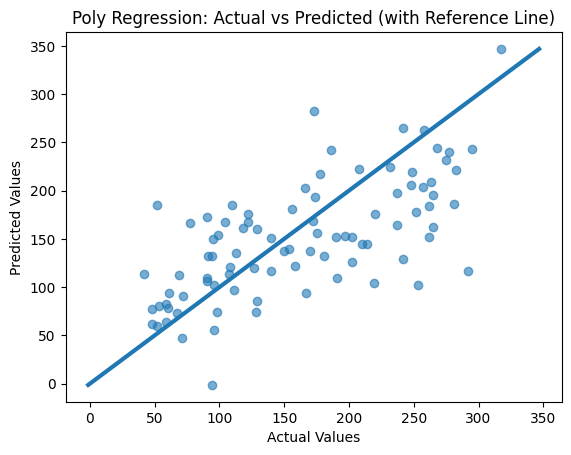

In [33]:
plt.scatter(y_test, y_pred, label="Predicted", alpha=0.6)

# Draw 45-degree reference line (perfect prediction)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

plt.plot([min_val, max_val], [min_val, max_val], linewidth=3)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Poly Regression: Actual vs Predicted (with Reference Line)")
plt.show()

<BarContainer object of 3 artists>

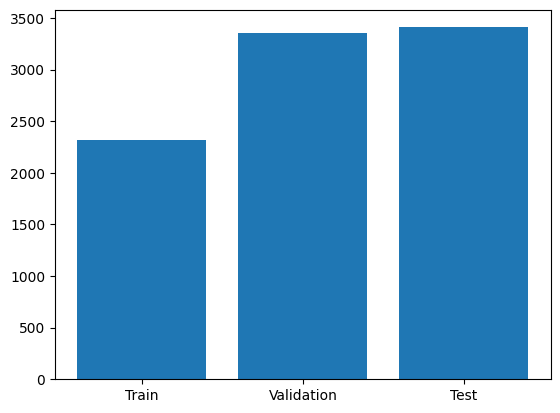

In [31]:
plt.bar(
    ["Train", "Validation", "Test"],
    [train_mse, val_mse, mse]
)